In [2]:
import copernicus_marine_client as cmc
from datetime import datetime
import xarray as xr
import cdsapi
import os

In [ ]:
# Reading data

In [3]:
cmc.login()

username:

  mcontreras3


password:

  ········


File /home/onyxia/.copernicus-marine-client/.copernicus-marine-credentials already exists, overwrite it ? [y/N]:

  y


INFO - 2024-10-02T08:28:46Z - Credentials file stored in /home/onyxia/.copernicus-marine-client/.copernicus-marine-credentials.


True

In [11]:
query_keywords = ["GLOBAL OCEAN GRIDDED L4 SEA SURFACE HEIGHTS AND DERIVED VARIABLES REPROCESSED (1993-ONGOING)"]
query_result = cmc.describe(contains=query_keywords)
query_result

ERROR - 2024-10-02T08:32:19Z - Client version 0.10.0 is not compatible with current backend service. Please update to the latest client version.
ERROR - 2024-10-02T08:32:19Z - Client version 0.10.0 is not compatible with current backend service. Please update to the latest client version.


{'products': [{'title': 'GLOBAL OCEAN GRIDDED L4 SEA SURFACE HEIGHTS AND DERIVED VARIABLES REPROCESSED (1993-ONGOING)',
   'product_id': 'SEALEVEL_GLO_PHY_L4_MY_008_047',
   'thumbnail_url': 'https://mdl-metadata.s3.waw3-1.cloudferro.com/metadata/thumbnails/SEALEVEL_GLO_PHY_L4_MY_008_047.jpg',
   'digital_object_identifier': '10.48670/moi-00148',
   'sources': ['Satellite observations'],
   'processing_level': 'Level 4',
   'production_center': 'CLS (France)'}]}

In [12]:
query_result = cmc.describe(contains=['GLOBAL OCEAN GRIDDED L4 SEA SURFACE HEIGHTS AND DERIVED VARIABLES REPROCESSED (1993-ONGOING)'], include_datasets=True)
for product in query_result.get('products'):
    for dataset in product.get('datasets'):
        print(f"{dataset.get('dataset_id')} - {dataset.get('dataset_name')}")

ERROR - 2024-10-02T08:32:30Z - Client version 0.10.0 is not compatible with current backend service. Please update to the latest client version.
ERROR - 2024-10-02T08:32:30Z - Client version 0.10.0 is not compatible with current backend service. Please update to the latest client version.
cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D - DT merged all satellites Global Ocean Gridded SSALTO/DUACS Sea Surface Height L4 product and derived variables
cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1M-m - DT merged all satellites Global Ocean Ocean Gridded Monthly Mean of Sea Level Anomalies L4 product
cmems_obs-sl_glo_phy-ssh_myint_allsat-l4-duacs-0.25deg_P1D - DT merged all satellites Global Ocean Gridded SSALTO/DUACS Sea Surface Height L4 product and derived variables
cmems_obs-sl_glo_phy-ssh_myint_allsat-l4-duacs-0.25deg_P1M-m - DT merged all satellites Global Ocean Ocean Gridded Monthly Mean of Sea Level Anomalies L4 product


In [13]:
for product in query_result.get('products'):
    for dataset in product.get('datasets'):
        if dataset.get('dataset_id') == "cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D":
            chosen_dataset = dataset
chosen_dataset 

{'dataset_id': 'cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D',
 'dataset_name': 'DT merged all satellites Global Ocean Gridded SSALTO/DUACS Sea Surface Height L4 product and derived variables',
 'versions': [{'label': '202112',
   'parts': [{'name': 'default',
     'services': [{'service_type': {'service_name': 'original-files',
        'short_name': 'files'},
       'uri': 'https://s3.waw3-1.cloudferro.com/mdl-native-07/native/SEALEVEL_GLO_PHY_L4_MY_008_047/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D_202112',
       'variables': [{'short_name': 'adt',
         'standard_name': 'sea_surface_height_above_geoid',
         'units': 'm',
         'bbox': [-179.875, -89.875, 179.875, 89.875],
         'coordinates': [{'coordinates_id': 'time',
           'units': '',
           'minimum_value': '1993-01-01T00:00:00Z',
           'maximum_value': '2023-06-07T00:00:00Z',
           'step': 'P1D',
           'values': None},
          {'coordinates_id': 'latitude',
     

In [22]:
start_datetime=datetime(2018,1,1)
end_datetime=datetime(2018,12,31)
test_data=cmc.load_xarray_dataset(
    dataset_id="cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D", 
    variables=["sla"],
    minimal_longitude=-170,
    maximal_longitude=170,
    minimal_latitude=-80,
    maximal_latitude=0,
#    minimal_depth=0.0,
#    maximal_depth=2.0,
    start_datetime=start_datetime,
    end_datetime=end_datetime,
)

WARNING - 2024-10-02T08:40:07Z - 'load_xarray_dataset' has been deprecated, use 'open_dataset' instead
WARNING - 2024-10-02T08:40:07Z - 'minimal_longitude' has been deprecated, use 'minimum_longitude' instead
WARNING - 2024-10-02T08:40:07Z - 'maximal_longitude' has been deprecated, use 'maximum_longitude' instead
WARNING - 2024-10-02T08:40:07Z - 'minimal_latitude' has been deprecated, use 'minimum_latitude' instead
WARNING - 2024-10-02T08:40:07Z - 'maximal_latitude' has been deprecated, use 'maximum_latitude' instead


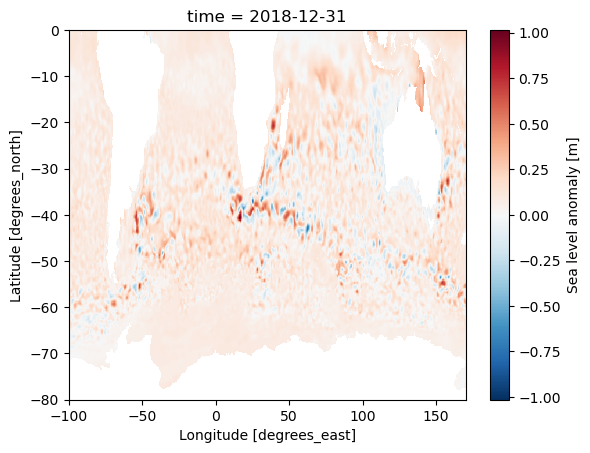

In [23]:
test_data.sla.isel(time=364).plot()

In [21]:
test_data.close()
del test_data

In [ ]:
test_data